# CS 109A/AC 209A/STAT 121A Data Science: Homework 0
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**

Import libraries

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
from bs4 import BeautifulSoup
import urllib
%matplotlib inline

## Problem 1: Processing Tabular Data from File

In this problem, we practice reading csv formatted data and doing some very simple data exploration.

### Part (a): Reading CSV Data with Numpy

Open the file $\mathtt{dataset}$\_$\mathtt{HW0.txt}$, containing birth biometrics as well as maternal data for a number of U.S. births, and inspect the csv formatting of the data. Load the data, without the column headers, into an numpy array. 

Do some preliminary explorations of the data by printing out the dimensions as well as the first three rows of the array. Finally, for each column, print out the range of the values. 

<b>Prettify your output</b>, add in some text and formatting to make sure your outputs are readable (e.g. "36x4" is less readable than "array dimensions: 36x4").

In [11]:
#OCG
#np.int
#help(np.loadtxt)
arr = np.array([[[1,2,3],[4,5,6]]])
print arr.shape, ' - ', arr.ndim
print type(arr[0])
print 'x'.join([str(dim) for dim in arr.shape])
print [x for x in data[0:2]]


(1L, 2L, 3L)  -  3
<type 'numpy.ndarray'>
1x2x3
[(2.96948929693, 1.97915605326, 16), (4.03896293829, 3.55568119774, 16)]


In [7]:
#data = np.loadtxt('dataset_HW0.txt'
#                  ,skiprows=1
#                  ,dtype={'names': ('birth_weight', 'femur_length', 'mother_age')
#                         ,'formats': (np.float, np.float, np.int)}
#                  ,delimiter=',')

data = np.genfromtxt('dataset_HW0.txt'
                     ,dtype=None
                    # ,dtype=(np.float, np.float, np.float)
                    #,names=('birth_weight', 'femur_length', 'mother_age')  .. only if setting names #,skip_header=1 
                     ,names=True
                     ,delimiter=',')

#print type(data)
print type(data.shape)
#print type(data[0])
#print type(data[0][2])


print 'array dimensions: {0}'.format('x'.join([str(dim) for dim in data.shape]))
print '(NumPy Structured array since data types are heterogenous)'
print '- each record consists of a tuple with {dim} columns: {cols}'.format(dim=len(data[0]),
                                                                            cols=','.join([col for col in data.dtype.names]))
print ''
print 'first three rows:'
for rec in data[:3]:
    print ','.join([str(val) for val in rec ])

print ''
output = ['data stats']
for col in data.dtype.names:
    output.append('column: {col:<15} min:{min:<20} max: {max}'.format(col=col
                                                                      ,min=np.min(data[col])
                                                                      ,max=np.max(data[col])))
print '\n'.join(output)
#print map(np.max, data['birth_weight']) #[data[col] for col in range(2)])
#help(np.loadtxt

<type 'tuple'>
array dimensions: 400
(NumPy Structured array since data types are heterogenous)
- each record consists of a tuple with 3 columns: birth_weight,femur_length,mother_age

first three rows:
2.96948929693,1.97915605326,16
4.03896293829,3.55568119774,16
5.30264328067,3.38563290356,15

data stats
column: birth_weight    min:2.96742562601        max: 9.02194194628
column: femur_length    min:0.479154166011       max: 6.64873007157
column: mother_age      min:15                   max: 49


### Part (b): Simple Data Statistics

Compute the mean birth weight and mean femur length for the entire dataset. Now, we want to split the birth data into three groups based on the mother's age:

1. Group I: ages 0-17
2. Group II: ages 18-34
3. Group III: ages 35-50

For each maternal age group, compute the mean birth weight and mean femure length. 

<b>Prettify your output.</b>

Compare the group means with each other and with the overall mean, what can you conclude?

In [5]:
group_1 = data[(data['mother_age'] >= 0) & (data['mother_age'] <= 17)]
group_2 = data[(data['mother_age'] >= 18) & (data['mother_age'] <= 34)]
group_3 = data[(data['mother_age'] >= 35) & (data['mother_age'] <= 50)]
#print group_1.shape, group_2.shape, group_3.shape

g1_mean_bw = np.mean(group_1['birth_weight'])
g1_mean_femur=np.mean(group_1['femur_length'])
print 'Group I   mean birth weight: {mean_bw}, mean femur length: {mean_femur}'.format(
     mean_bw=g1_mean_bw
    ,mean_femur=g1_mean_femur)

g2_mean_bw = np.mean(group_2['birth_weight'])
g2_mean_femur=np.mean(group_2['femur_length'])
print 'Group II  mean birth weight: {mean_bw}, mean femur length: {mean_femur}'.format(
     mean_bw=g2_mean_bw
    ,mean_femur=g2_mean_femur)

g3_mean_bw = np.mean(group_3['birth_weight'])
g3_mean_femur=np.mean(group_3['femur_length'])
print 'Group III mean birth weight: {mean_bw}, mean femur length: {mean_femur}'.format(
     mean_bw=g3_mean_bw
    ,mean_femur=g3_mean_femur)

print '''
Conclusion: children birthed to both mothers less than 18, and greater than 34
    tend to be smaller (lower birth weigth & shorter femur length). Would need more
    domain knowledge but I'm guessing children birthed to mothers in the 18-34 age 
    range tend to be healther than those on either side of this rage.
    '''

Group I   mean birth weight: 5.16889979912, mean femur length: 3.50680640853
Group II  mean birth weight: 6.70536363695, mean femur length: 4.0043330551
Group III mean birth weight: 5.83665361844, mean femur length: 3.79489080744

Conclusion: children birthed to both mothers less than 18, and greater than 34
    tend to be smaller (lower birth weigth & shorter femur length). Would need more
    domain knowledge but I'm guessing children birthed to mothers in the 18-34 age 
    range tend to be healther than those on either side of this rage.
    


### Part (c): Simple Data Visualization

Visualize the data using a 3-D scatter plot. How does your visual analysis compare with the stats you've computed in Part (b)?


Conclusion: simple data plot doesn't provide much information overall, too crowded.
    Perhaps coloring by Group number or similar would help out.



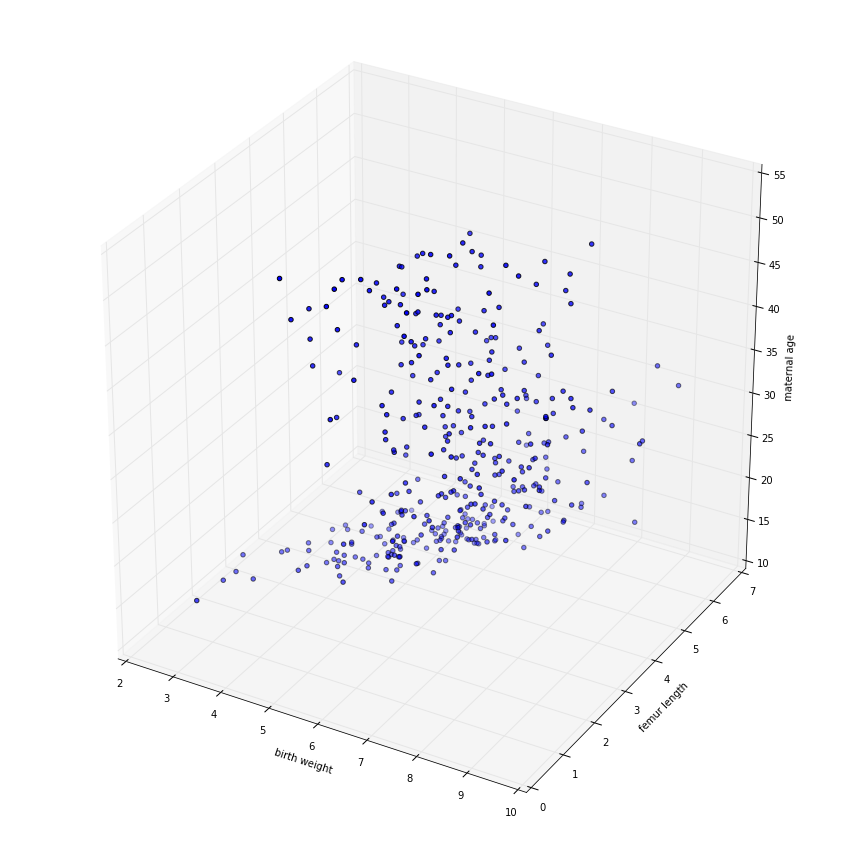

In [6]:
fig = plt.figure(figsize=(15,15))
axes = fig.add_subplot(111, projection='3d')
axes.scatter(data['birth_weight'], data['femur_length'], data['mother_age'])
axes.set_xlabel('birth weight')
axes.set_ylabel('femur length')
axes.set_zlabel('maternal age')

print '''
Conclusion: simple data plot doesn't provide much information overall, too crowded.
    Perhaps coloring by Group number or similar would help out.
'''
#axes_2 = fig.add_subplot(400, 3, 2)
#axes_1.scatter(range(400), data['femur_length'])
#ax.scatter(xs, ys, zs, c=c, marker=m)


### Part (d): Simple Data Visualization (Continued)

Visualize two data attributes at a time,

1. maternal age against birth weight
2. maternal age against femur length
3. birth weight against femur length

using 2-D scatter plots.

Compare your visual analysis with your analysis from Part (b) and (c).

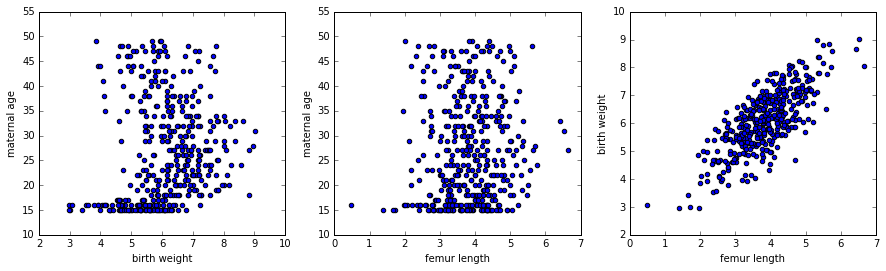

In [164]:
fig = plt.figure(figsize=(15,4))
axes_1 = fig.add_subplot(1, 3, 1)
axes_1.scatter(data['birth_weight'], data['mother_age'])
axes_1.set_xlabel('birth weight')
axes_1.set_ylabel('maternal age')

axes_2 = fig.add_subplot(1, 3, 2)
axes_2.scatter(data['femur_length'], data['mother_age'])
axes_2.set_xlabel('femur length')
axes_2.set_ylabel('maternal age')

axes_3 = fig.add_subplot(1, 3, 3)
axes_3.scatter(data['femur_length'], data['birth_weight'])
axes_3.set_xlabel('femur length')
axes_3.set_ylabel('birth weight')


### Part (e): More Data Visualization

Finally, we want to visualize the data by maternal age group. Plot the data again using a 3-D scatter plot, this time, color the points in the plot according to the age group of the mother (e.g. use red, blue, green to represent group I, II and III respectively).

Compare your visual analysis with your analysis from Part (a) - (c).


Conclusion: 



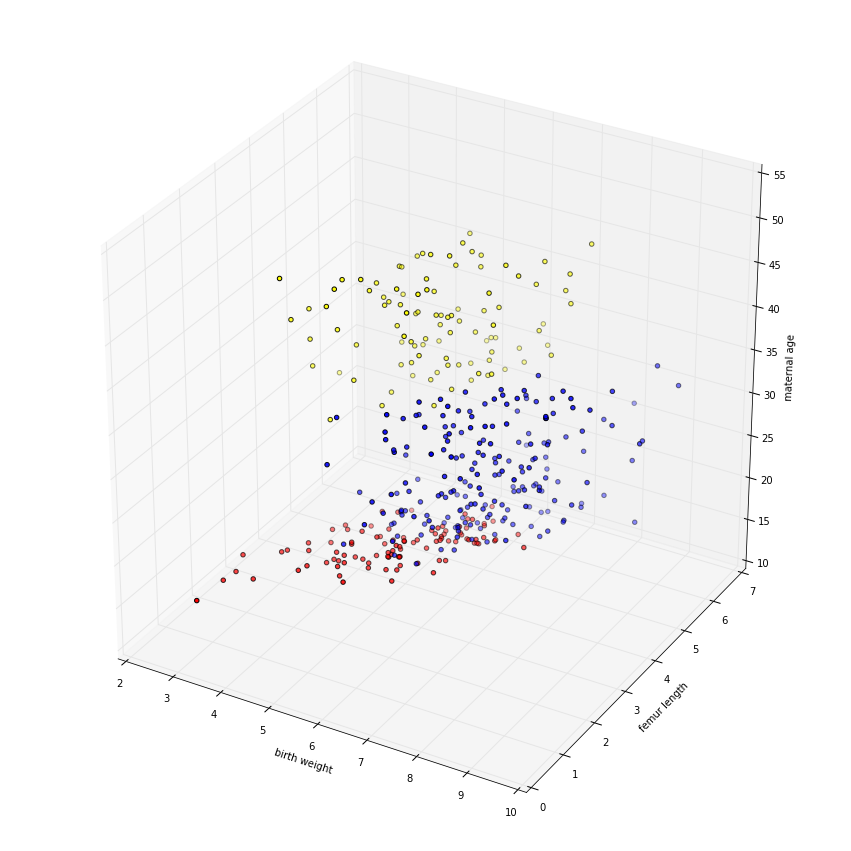

In [222]:
fig = plt.figure(figsize=(15,15))
axes = fig.add_subplot(111, projection='3d')

axes.scatter(group_1['birth_weight'], group_1['femur_length'], group_1['mother_age'], c='red')
axes.scatter(group_2['birth_weight'], group_2['femur_length'], group_2['mother_age'], c='blue')
axes.scatter(group_3['birth_weight'], group_3['femur_length'], group_3['mother_age'], c='yellow')
axes.set_xlabel('birth weight')
axes.set_ylabel('femur length')
axes.set_zlabel('maternal age')

print '''
Conclusion: 
'''

## Problem 2: Processing Web Data

In this problem we practice some basic web-scrapping using Beautiful Soup.

### Part (a): Opening and Reading Webpages

Open and load the page (Kafka's The Metamorphosis) at 

$\mathtt{http://www.gutenberg.org/files/5200/5200-h/5200-h.htm}$

into a BeautifulSoup object. 

The object we obtain is a parse tree (a data structure representing all tags and relationship between tags) of the html file. To concretely visualize this object, print out the first 1000 characters of a representation of the parse tree using the $\mathtt{prettify()}$ function.

In [227]:
page = urllib.urlopen('http://www.gutenberg.org/files/5200/5200-h/5200-h.htm')
soup = BeautifulSoup(page, 'lxml')
print soup.prettify()[:1000]

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
 <head>
  <title>
   Metamorphosis by Franz Kafka
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 </head>
 <body>
  <pre>

The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **


Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: August 16, 2005 [EBook #5200]
First posted: May 13, 2002
Last updated: May 20, 2012

Language: English

Character set encoding: ISO-8859-1

*** START OF THIS PROJECT GUTENBERG EBOOK ME


### Part (b): Exploring the Parsed HTML

Explore the nested data structure you obtain in Part (a) by printing out the following:

1. the content of the head tag
2. the text of the head tag
3. each child of the head tag
2. the text of the title tag
3. the text of the preamble (pre) tag
4. the text of the first paragraph (p) tag

In [266]:
head = soup.find_all('head')[0]
print '--- 1. the content of the head tag ---\nBEGIN\n{}\nEND'.format(head.contents)
print '--- 2. the text of the head tag ---\nBEGIN\n{}\nEND'.format(head.string if head.string else '\t(no text)')
print '--- 3. each child of head ---\n\t--raw format: {}--'.format(list(head.children))
print 'BEGIN\n' + '\n'.join(str(c) for c in head.children) + '\nEND'
title = soup.find_all('title')[0]
print '--- 4. the text of the title tag ---\nBEGIN\n{}\nEND'.format(title.string if title.string else '\t(no text)')
pre1 = soup.find_all('pre')[0]
pre2 = soup.find_all('pre')[1]
print '--- 5. the text of the preamble (pre) tag ---\n'
print 'BEGIN (first pre)\n{}\nEND'.format(pre1.string if pre1.string else '\t(no text)')
print 'BEGIN (second/last pre)\n{}\nEND'.format(pre2.string if pre2.string else '\t(no text)')
p1 = soup.find_all('p')[0]
print '--- 6. the text of the first paragraph (p) tag ---\nBEGIN\n{}\nEND'.format(p1.string if p1.string else '\t(no text)')


--- 1. the content of the head tag ---
BEGIN
[u'\n', <title>Metamorphosis by Franz Kafka</title>, u'\n', <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>, u'\n']
END
--- 2. the text of the head tag ---
BEGIN
	(no text)
END
--- 3. each child of head ---
	--raw format: [u'\n', <title>Metamorphosis by Franz Kafka</title>, u'\n', <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>, u'\n']--
BEGIN


<title>Metamorphosis by Franz Kafka</title>


<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>


END
--- 4. the text of the title tag ---
BEGIN
Metamorphosis by Franz Kafka
END
--- 5. the text of the preamble (pre) tag ---

BEGIN (first pre)


The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this

### Part (c): Extracting Text

Now we want to extract the text of The Metamorphosis and do some simple analysis. Beautiful Soup provides a way to extract all text from a webpage via the $\mathtt{get}$_$\mathtt{text()}$ function. 

Print the first and last 5000 characters of the text returned by $\mathtt{get}$_$\mathtt{text()}$. Is this the content of the novela? Where is the content of The Metamorphosis stored in the BeautifulSoup object?

In [262]:
txt = soup.get_text()
print 'BEGIN first 5000'
print txt[:5000]
print 'END first 5000'
print 'BEGIN last 5000'
print txt[-5000:]
print 'END last 5000'

BEGIN first 5000


Metamorphosis by Franz Kafka





The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **


Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: August 16, 2005 [EBook #5200]
First posted: May 13, 2002
Last updated: May 20, 2012

Language: English

Character set encoding: ISO-8859-1

*** START OF THIS PROJECT GUTENBERG EBOOK METAMORPHOSIS ***






Copyright (C) 2002 by David Wyllie.




  Metamorphosis
  Franz Kafka
Translated by David Wyllie
I
One morning, when Gregor Samsa woke from troubled dreams, he found
himself transfor

### Part (d): Extracting Text (Continued)

Using the $\mathtt{find}$_$\mathtt{all()}$ function, extract the text of all $\mathtt{p}$ tags and concatenate the result into a single string. Print out the first 1000 characters of the string as a sanity check.

In [271]:
p_all = soup.find_all('p')
p_all_text = ' '.join(p.string for p in p_all)
print p_all_text[:1000]

One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.  He lay on
his armour-like back, and if he lifted his head a little he could
see his brown belly, slightly domed and divided by arches into stiff
sections.  The bedding was hardly able to cover it and seemed ready
to slide off any moment.  His many legs, pitifully thin compared
with the size of the rest of him, waved about helplessly as he
looked. "What's happened to me?" he thought.  It wasn't a dream.  His room,
a proper human room although a little too small, lay peacefully
between its four familiar walls.  A collection of textile samples
lay spread out on the table - Samsa was a travelling salesman - and
above it there hung a picture that he had recently cut out of an
illustrated magazine and housed in a nice, gilded frame.  It showed
a lady fitted out with a fur hat and fur boa who sat upright,
raising a heavy fur muff that covered the whole of he


### Part (e): Sentence and Word Count

Count the number of words in The Metamorphosis. Compute the average word length and plot a histogram of word lengths.

Count the number of sentences in The Metamorphosis. Compute the average sentence length and plot a histogram of sentence lengths.

**Hint**: You'll need to pre-process the text in order to obtain the correct word/sentence length and count. 

word count: 22087
average word length: 4.36329062344
sentence count: 803
average sentence length (# chars): 149.435865504


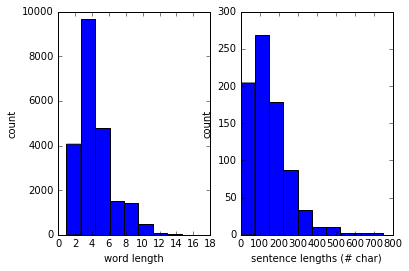

In [314]:
#optimal solution would likely involve nltk library
words = p_all_text.split()
print 'word count: {}'.format(len(words))
word_lens = [len(w) for w in words]
avg_word_len = sum(word_lens)/(1.0 * len(words))
print 'average word length: {}'.format(avg_word_len)

fig = plt.figure()
axes_1 = fig.add_subplot(1,2,1)
axes_1.hist(word_lens)
axes_1.set_xlabel('word length')
axes_1.set_ylabel('count')
axes_1.set_title = 'word count vs. word length'


sentences = []
#below 'short' check after initial processing showed Mr. Mrs. should be the only titles that need escaping
# short = [s for s in sentences if len(s) < 10]
p_all_text = p_all_text.replace('Mr.','Mr_' )
p_all_text = p_all_text.replace('Mrs.','Mrs_' )
simple = p_all_text.split('.')
for part in simple:
    if '?' in part or '!' in part:
        if '?' in part and '!' in part:
            qm = part.split('?')
            for q_part in qm:
                sentences.extend(q_part.split('!'))            
        elif '?' in part:
            qm = part.split('?') 
            sentences.extend(qm)
        elif '!' in part:
            em = part.split('!')
            sentences.extend(em)
    else:
        sentences.append(part)

print 'sentence count: {}'.format(len(sentences))
sentence_lens = [len(s) for s in sentences]
avg_sentence_len = sum(sentence_lens)/(1.0 * len(sentences))
print 'average sentence length (# chars): {}'.format(avg_sentence_len)

axes_2 = fig.add_subplot(1,2,2)
axes_2.hist(sentence_lens)
axes_2.set_xlabel('sentence lengths (# char)')
axes_2.set_ylabel('count')
axes_2.set_title = 'sentence count vs. sentence length'


#sentences = [s.split('?')]
#sentences = sentences.split('!')
#short = [s for s in sentences if len(s) < 10]
#s1 = []
#s = 'hello? how will! this work? not sure?'
#qm = s.split('?')
#for q_part in qm:
#    print q_part
#    s1.extend(q_part.split('!'))
#print s1
#print qm
#TODO: hist plot + the rest

## Problem 3: Data from Simulations

In this problem we practice generating data by setting up a simulation of a simple phenomenon, a queue. 

Suppose we're interested in simulating a queue that forms in front of a small Bank of America branch with one teller, where the customers arrive one at a time.

We want to study the queue length and customer waiting time.

### Part (a): Simulating Arrival and Service Time

Assume that gaps between consecutive arrivals are uniformly distributed over the interval of 1 to 20 minutes (i.e. any two times between 1 minute and 6 minutes are equally likely). 

Assume that the service times are uniform over the interval of 5 to 15 minutes. 

Generate the arrival and service times for 100 customers, using the $\mathtt{uniform()}$ function from the $\mathtt{random}$ library.

In [359]:
import random
arrive_times = [int(random.uniform(1, 21)) for i in range(100)]
service_times = [int(random.uniform(5, 16)) for i in range(100)]
print arrive_times
print service_times

[6, 18, 13, 14, 13, 2, 14, 9, 5, 20]
[9, 5, 12, 15, 13, 14, 5, 5, 15, 15]


### Part (b): Simulating the Queue

Write function that computes the average queue length and the average customer wait time, given the arrival times and the service times.

In [387]:
from collections import deque
arrive_times = deque([2,2,1,1])
service_times = deque([3,3,3,2])
wait_times = [0,]
q = []
q_length = []
next_arrival_minute = 0
#first person has zero wait time
minutes_passed = 0
for minute in range(1, 10):
    minutes_passed += 1
    if minute == arrive_times[0]:
        print arrive_times[0]
        #arrive_times = arrive_times[1:]
        print arrive_times.pop()
        next_arrival_minute = minutes_passed + arrive_times[0]

    elif minute == next_arrival_minute:
        print 'pop {}'.format(arrive_times.pop())
        next_arrival_minute = minutes_passed + arrive_times[0]

    

    

minute gone, 1 have passed
2
1
minute gone, 2 have passed
minute gone, 3 have passed
pop 1
minute gone, 4 have passed
minute gone, 5 have passed
pop 2
minute gone, 6 have passed
minute gone, 7 have passed
pop 2


IndexError: deque index out of range

### Part (c): Average Queue Length and Wait Time

Run your simulation 500 times and report the mean and std of the average wait time and queue length for 100 customers. What do these statistics mean?

Explain why is isn't sufficient to run our simulation **once** and report the average wait time/queue length we obtain.

## Problem 4 (Challenge Problem): More Web Scrapping

In this problem we practice extracting tabular web data. Open and read the webpage at

$\mathtt{http://www.thisismoney.co.uk/money/news/article-2928285/Economy-tables-GDP-rates-inflation-history-unemployment.html}$

Extract the Inflation History table and load it into a numpy array.

Generate a line graph representing the trend of consumer price index vs time (in months).